In [1]:
from qiskit import QuantumCircuit
from qiskit import quantum_info
from qiskit.primitives import StatevectorEstimator, StatevectorSampler
from qiskit.circuit import Parameter
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2
from qiskit import transpile

import numpy as np

/Users/isambalghari/MS Physics/Summer-23-24/Intro to Quantum Computing/Qiskit/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Spin Glasses

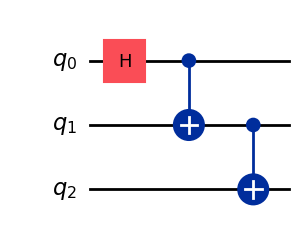

In [9]:
circuit1 = QuantumCircuit(3)

circuit1.h(0)
circuit1.cx(0,1)
circuit1.cx(1,2)

circuit1.draw('mpl')

In [3]:
ket0 = quantum_info.Statevector([1, 0])
input_state = quantum_info.Statevector(ket0^ket0^ket0)
ghz_state = input_state.evolve(circuit1)

ghz_state.draw('latex')

<IPython.core.display.Latex object>

In [4]:
magnetization_opr = [quantum_info.SparsePauliOp(['IIZ', 'IZI', 'ZII'], [1/3, 1/3, 1/3])]
hamiltonian_opr = [quantum_info.SparsePauliOp(['IZZ', 'ZIZ', 'ZZI', 'IIX', 'IXI', 'XII'], [1, 1, 1, -1, -1, -1])]

SV_estimator_m = StatevectorEstimator()
result_m = SV_estimator_m.run([(circuit1, magnetization_opr, None, 0.0001)]).result()

SV_estimator_h = StatevectorEstimator()
result_h = SV_estimator_h.run([(circuit1, hamiltonian_opr, None, 0.0001)]).result()


In [5]:
print(f"Expected value of M: {result_m[0].data.evs[0]:.02f}")
print(f"Expected value of H: {result_h[0].data.evs[0]:.02f}")

Expected value of M: -0.00
Expected value of H: 3.00


#### (c):

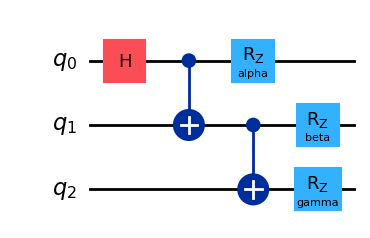

In [10]:
alpha = Parameter('alpha')
beta = Parameter('beta')
gamma = Parameter('gamma')

circuit1.rz(alpha, 0)
circuit1.rz(beta, 1)
circuit1.rz(gamma, 2)
circuit1.draw('mpl')

In [11]:
SV_estimator = StatevectorEstimator()

result_m = SV_estimator.run([(circuit1, magnetization_opr, [[np.pi/6, np.pi/5, np.pi/4], [np.pi/6, np.pi/5, np.pi/4]], 0.001)]).result()
result_h = SV_estimator.run([(circuit1, hamiltonian_opr, [[np.pi/6, np.pi/5, np.pi/4], [np.pi/6, np.pi/5, np.pi/4]], 0.001)]).result()

print(f"Expected value of M: [{result_m[0].data.evs[0]:.02f},{result_m[0].data.evs[1]:.02f}]")
print(f"Expected value of H: [{result_h[0].data.evs[0]:.02f},{result_h[0].data.evs[1]:.02f}]")

Expected value of M: [-0.00,-0.00]
Expected value of H: [3.00,3.00]


This distribution is much accurate compared to the result of implementation with ancilla qubit.